# 读取 UCI  SPECTF Heart 数据集，使用 k-最近邻算法进行缺失值填充，计算自变量（各属性）的填充性能，进行RMSE分析

2023年6月11日

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

import missingno as msno

from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import random
from scipy.stats import entropy

import matplotlib.pyplot as plt
from PIL import Image

In [3]:
rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))

In [ ]:
SPECTF Heart SPECTF数据集是一组用于分类的医学图像数据，它包含267个样本，每个样本有44个特征变量和一个二分类目标变量。
该数据集的主要信息如下：

1. 目标变量：一个二分类变量，表示病人是否患有心脏疾病，属于典型的二分类问题。

2. 输入特征：44个特征变量，描述了放射性核素扫描图像的各种参数，这些参数被用于判断病人是否患有心脏疾病。

3. 数据来源：该数据集由UCI机器学习库提供，数据收集于1990年代初，病人是在美国一家医院进行检查后收集的。

该数据集的名称“SPECTF”是“单光子发射计算机断层扫描图像”（Single Photon Emission Computed Tomography Images）的缩写，
表示该数据集是由医学图像数据构成的。

In [2]:
# 读取数据集
#column_names = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'serum_cholesterol','fasting_blood_sugar', 'resting_ecg', 
#                'max_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak', 'slope', 'ca', 'thal', 'target']
spectf_df = pd.read_csv('spect.csv',header=0)  # , sep='\s+' , names=column_names, names=column_names, "\t" '\s+'\s+ ,nrows=100, usecols=range(10000)

"""
header=0 : 表示CSV文件第一行是列名,将第一个行作为列名读取
header=1 : 表示CSV文件的第二行是列名,将第二行作为列名读取,跳过第一个行
header=None : 表示CSV文件没有列名行,将默认的'col1','col2'等作为列名
"""

"\nheader=0 : 表示CSV文件第一行是列名,将第一个行作为列名读取\nheader=1 : 表示CSV文件的第二行是列名,将第二行作为列名读取,跳过第一个行\nheader=None : 表示CSV文件没有列名行,将默认的'col1','col2'等作为列名\n"

In [3]:
spectf_df

,OVERALL_DIAGNOSIS,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,1,59,52,70,67,73,66,72,61,58,...,66,56,62,56,72,62,74,74,64,67
1,1,72,62,69,67,78,82,74,65,69,...,65,71,63,60,69,73,67,71,56,58
2,1,71,62,70,64,67,64,79,65,70,...,73,70,66,65,64,55,61,41,51,46
3,1,69,71,70,78,61,63,67,65,59,...,61,61,66,65,72,73,68,68,59,63
4,1,70,66,61,66,61,58,69,69,72,...,67,69,70,66,70,64,60,55,49,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,0,74,69,75,70,70,74,77,77,65,...,66,67,63,61,71,68,66,65,54,57
263,0,72,61,64,66,64,59,68,66,76,...,69,64,67,71,69,68,65,73,56,52
264,0,75,73,72,77,68,67,76,73,67,...,70,67,72,71,79,75,77,75,67,71
265,0,59,62,72,74,66,66,74,76,63,...,65,71,67,69,77,78,77,76,70,70


In [9]:
#knowledge_df.columns

In [4]:
# 将分类数据（目标类别）转化为数值数据
#sonar_df[60] = sonar_df[60].map({'M':0, 'R':1})
#knowledge_df[' UNS'] = pd.Categorical(knowledge_df[' UNS']).codes

In [5]:
#删除目标列
#drop_cols = ['cost1','cost2','cost3','cost4']
#glass_df = glass_df.drop('Type',axis=1)

In [ ]:
具体流程是:
#1. 将数据集中 ？替换为nan，并进行众数填充
1. 读取数据到spectf_df,拷贝原始真实值为spectf_df_origin
2. 将heart_df划分为train_df和test_df,拷贝原始真实值为train_df_origin和test_df_origin
3. 随机在train_df和test_df中产生10%的缺失值
4. 使用KNN在X_train中填充缺失值,并fit knn_imputer模型，调整K值 
5. 使用knn_imputer在X_test_scaled中填充缺失值 
6. 计算填充后test_imputed与标准化后真实值test_df_origin的MSE

In [60]:
# Replace '?' with NaN 数据集中包含？，将？替换为nan
#hepatitis_df.replace('?', np.nan, inplace=True)

In [62]:
#将原始数据中？数据使用众数进行填充
#hepatitis_df = hepatitis_df.fillna(hepatitis_df.mode().iloc[0])

In [4]:
#hepatitis_df_origin = pd.DataFrame(hepatitis_df_origin,columns = column_names)
spectf_df.isna().sum()

OVERALL_DIAGNOSIS    0
F1R                  0
F1S                  0
F2R                  0
F2S                  0
F3R                  0
F3S                  0
F4R                  0
F4S                  0
F5R                  0
F5S                  0
F6R                  0
F6S                  0
F7R                  0
F7S                  0
F8R                  0
F8S                  0
F9R                  0
F9S                  0
F10R                 0
F10S                 0
F11R                 0
F11S                 0
F12R                 0
F12S                 0
F13R                 0
F13S                 0
F14R                 0
F14S                 0
F15R                 0
F15S                 0
F16R                 0
F16S                 0
F17R                 0
F17S                 0
F18R                 0
F18S                 0
F19R                 0
F19S                 0
F20R                 0
F20S                 0
F21R                 0
F21S                 0
F22R       

In [5]:
spectf_df_origin = spectf_df.copy()

In [8]:
#le = LabelEncoder()
#for col in ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']:
    #adult_df[col] = le.fit_transform(adult_df[col])

In [17]:
# 可视化缺失值
#msno.matrix(YachtHydrodynamics_df_origin)

X_train = df.iloc[:, :-1]
y_train = df.iloc[:, -1]
 df.iloc[:, :-1] 用于取出除最后一列之外的所有特征数据,df.iloc[:, -1] 用于取出最后一列的标签数据。

In [3]:
#1. 将数据集划分为训练集和测试集
#random_state 的取值通常为整数,不同的整数会产生不同的随机结果,而相同的整数会产生相同的随机结果,实现可重复性
#X_train, X_test, y_train, y_test = train_test_split(abalone_df.iloc[:, :-1],abalone_df.iloc[:, -1],test_size=0.2,random_state=1)
train_df, test_df = train_test_split(spectf_df,test_size=0.2,random_state=24)


In [4]:
train_df_origin = train_df.copy()
test_df_origin = test_df.copy()

In [20]:
#train_df = train_df_origin.copy()
#test_df = test_df_origin.copy()

In [5]:
# 2. 在训练集中随机产生10%的数据缺失
missing_rate = 0.1
np.random.seed(1) 
ixt = [(row, col) for row in range(train_df.shape[0]) for col in range(train_df.shape[1])]

for row, col in random.sample(ixt, int(round(missing_rate*len(ixt)))):
    train_df.iat[row, col] = np.nan

In [6]:
# Calculate the missing value distribution每列分别找出包含缺失值的行的位置，然后将所有列的缺失值的行位置合并到一个列表中，得到了缺失值的分布。
#然后，我们使用 np.bincount 函数计算了每个行位置出现的次数，然后除以总的缺失值数量，得到了每个行位置的比例，这就是缺失值的分布。最后，我们使用 scipy.stats.entropy 函数计算了这个分布的熵。
missing_values_distribution = []
for col in train_df.columns:
    missing_row_positions = train_df[train_df[col].isnull()].index.tolist()
    missing_values_distribution.extend(missing_row_positions)

# Convert the distribution to proportions
#missing_values_distribution = np.array(missing_values_distribution)
missing_values_distribution = np.array(missing_values_distribution).astype(int)
missing_values_proportions = np.bincount(missing_values_distribution) / len(missing_values_distribution)

# Calculate the entropy of the missing value distribution
missing_values_entropy = entropy(missing_values_proportions)

print(f'The entropy of the missing value distribution in the train set is {missing_values_entropy}')

The entropy of the missing value distribution in the train set is 5.261745314644289


In [19]:
print('train_df.shape[0]=',train_df.shape[0])
print('train_df.shape[1]=',train_df.shape[1])
print('row=',row)
print('col=',col)
print('len(ixt)=',len(ixt))

train_df.shape[0]= 213
train_df.shape[1]= 45
row= 114
col= F22S
len(ixt)= 9585


<AxesSubplot:>

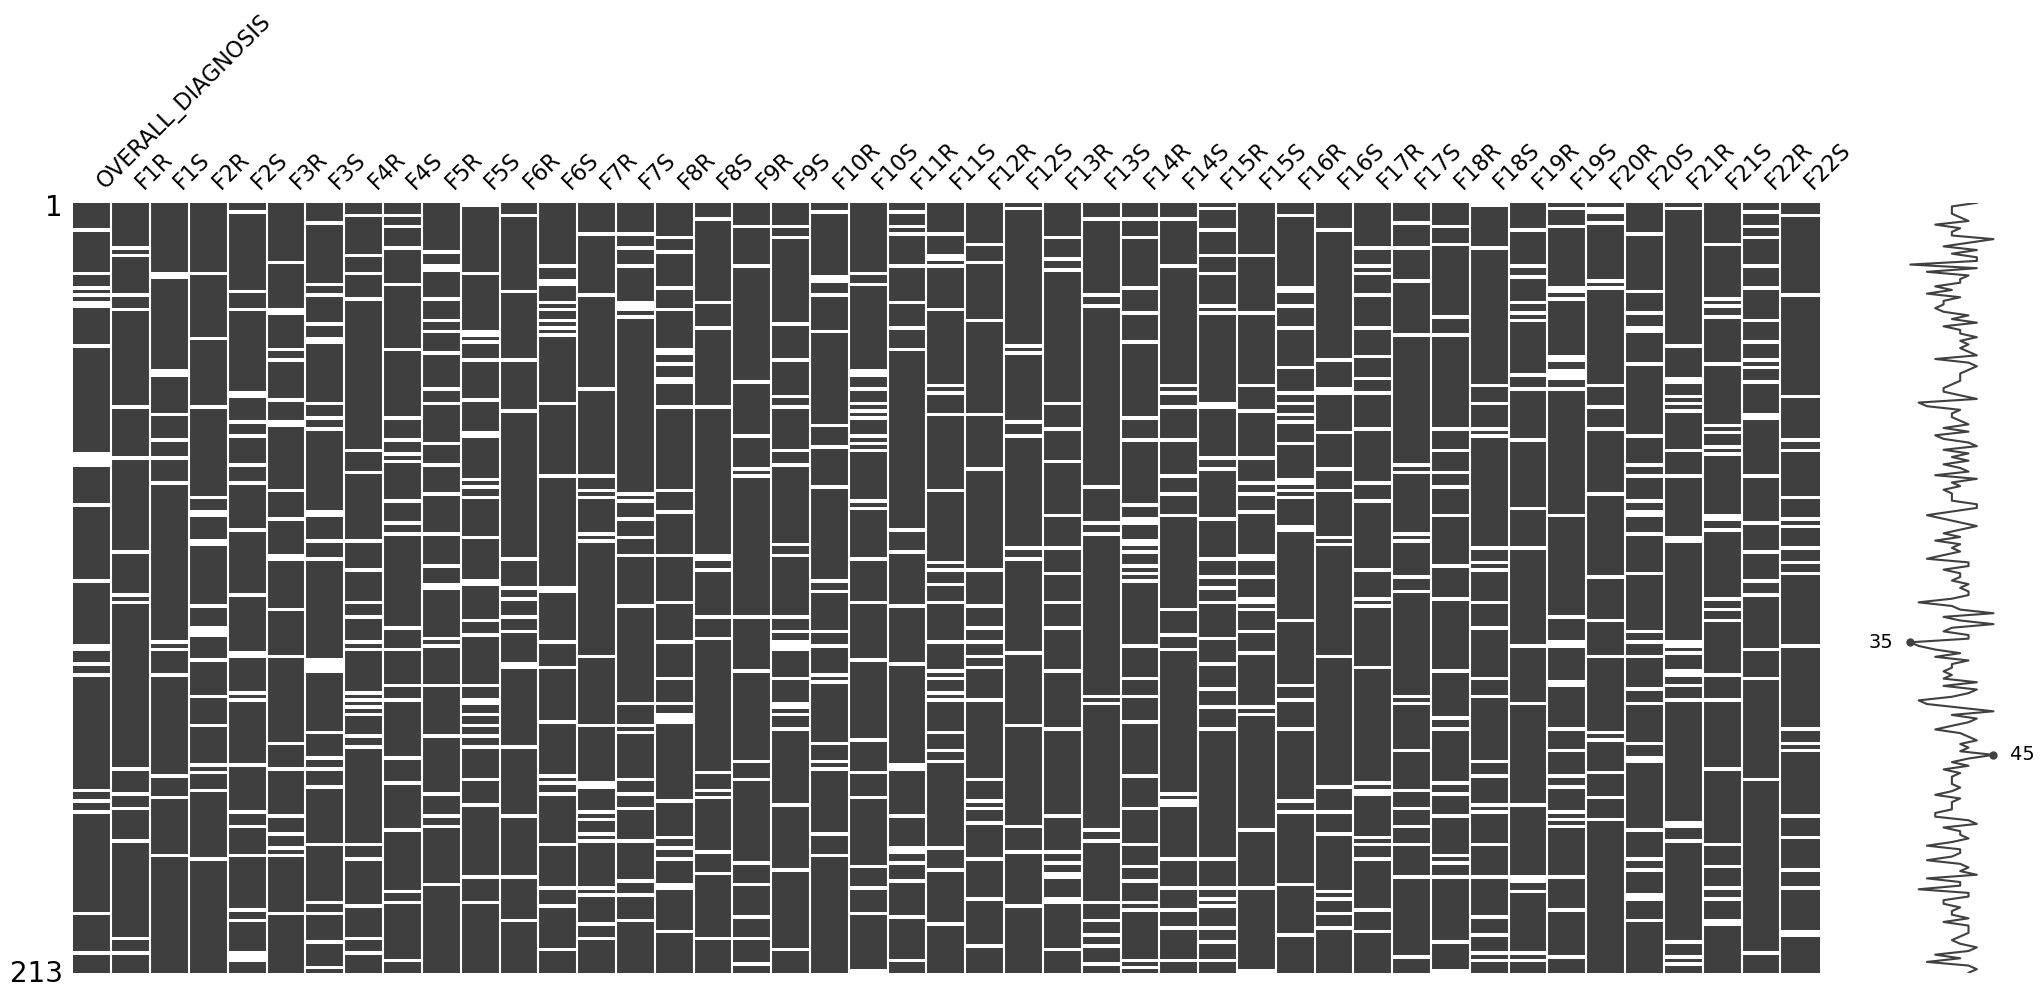

In [7]:
# 可视化缺失值
msno.matrix(train_df)

In [8]:
# 3. 在测试集中随机产生10%的数据缺失
#import time
np.random.seed(0) 
#np.random.seed(int(time.time()))  # Use current timestamp as random seed
missing_rate = 0.1
ixtest = [(row2, col2) for row2 in range(test_df.shape[0]) for col2 in range(test_df.shape[1])]
for row2, col2 in random.sample(ixtest, int(round(missing_rate*len(ixtest)))):
    test_df.iat[row2, col2] = np.nan

In [9]:
# Calculate the missing value distribution每列分别找出包含缺失值的行的位置，然后将所有列的缺失值的行位置合并到一个列表中，得到了缺失值的分布。
#然后，我们使用 np.bincount 函数计算了每个行位置出现的次数，然后除以总的缺失值数量，得到了每个行位置的比例，这就是缺失值的分布。最后，我们使用 scipy.stats.entropy 函数计算了这个分布的熵。
missing_values_distribution = []
for col in test_df.columns:
    missing_row_positions = test_df[test_df[col].isnull()].index.tolist()
    missing_values_distribution.extend(missing_row_positions)

# Convert the distribution to proportions
#missing_values_distribution = np.array(missing_values_distribution)
missing_values_distribution = np.array(missing_values_distribution).astype(int)
missing_values_proportions = np.bincount(missing_values_distribution) / len(missing_values_distribution)

# Calculate the entropy of the missing value distribution
missing_values_entropy = entropy(missing_values_proportions)

print(f'The entropy of the missing value distribution in the test set is {missing_values_entropy}')

The entropy of the missing value distribution in the test set is 3.9088862407364147


In [23]:
print('test_df.shape[0]=',test_df.shape[0])
print('test_df.shape[1]=',test_df.shape[1])
print('row=',row2)
print('col=',col2)
print('len(ixtest)=',len(ixtest))

test_df.shape[0]= 54
test_df.shape[1]= 45
row= 5
col= 2
len(ixtest)= 2430


<AxesSubplot:>

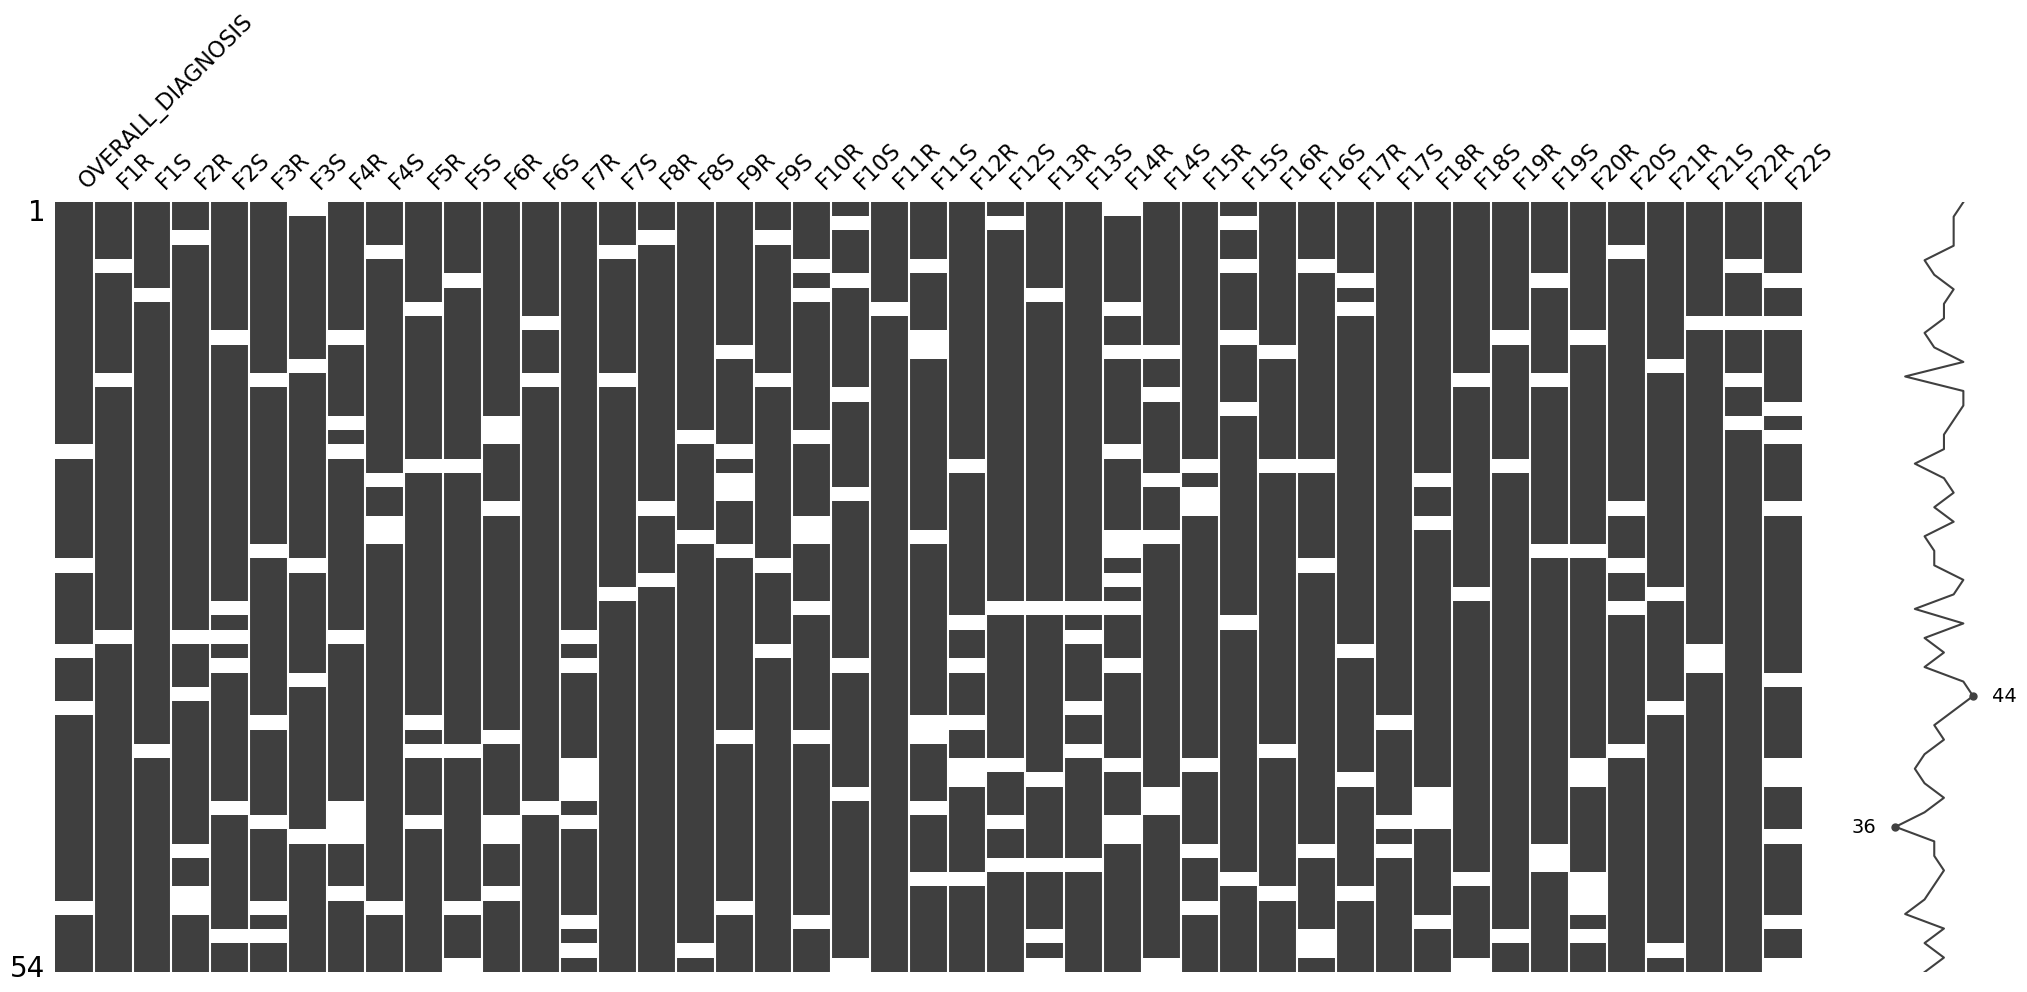

In [10]:
# 可视化缺失值
msno.matrix(test_df)

In [11]:
  #计算自变量X的填充性能RMSE 
k_values = []
X_rmse_values=[]
X_rmse_mean=[]
for k in range(1, 20,1):
    imputer = KNNImputer(n_neighbors=k, weights="uniform")
    train_filled = imputer.fit_transform(train_df)
    test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
    train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
    test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
    #mse_train = mean_squared_error(train_df_origin, train_filled)
    mse_test = mean_squared_error(test_df_origin, test_filled, multioutput='raw_values')
    mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
    #print(f'Train MSE: {mse_train}')
    print(f'k=: {k}')
    print(f'Test MSE: {mse_test}')
    print(f'Test mean MSE: {mse_mean}')
    k_values.append(k)
    X_rmse_values.append(np.sqrt(mse_test))
    X_rmse_mean.append(np.sqrt(mse_mean))

k=: 1
Test MSE: [1.85185185e-02 2.18518519e+00 2.01851852e+00 1.14629630e+01
 2.68518519e+00 1.62407407e+01 1.33148148e+01 1.08888889e+01
 3.03703704e+00 5.29629630e+00 6.31481481e+00 1.90740741e+00
 1.42592593e+00 7.42592593e+00 3.88888889e-01 7.03703704e-01
 1.12962963e+00 1.39444444e+01 2.10000000e+01 1.92592593e+00
 4.90740741e+00 2.66666667e+00 1.48888889e+01 1.87037037e+01
 5.59259259e+00 9.01851852e+00 1.01666667e+01 2.57222222e+01
 2.11296296e+01 2.49814815e+01 4.07407407e+00 1.14814815e+00
 7.75185185e+01 9.44444444e-01 3.87037037e+00 4.25925926e-01
 8.14814815e-01 1.01111111e+01 1.19814815e+01 7.46296296e+00
 1.93333333e+01 2.77777778e+00 3.22222222e+00 4.55555556e+00
 2.87222222e+01]
Test mean MSE: 9.734567901234568
k=: 2
Test MSE: [9.25925926e-03 1.87962963e+00 1.89351852e+00 8.81018519e+00
 9.90740741e-01 7.94444444e+00 5.30092593e+00 1.07268519e+01
 1.58333333e+00 6.40277778e+00 4.05555556e+00 1.53703704e+00
 6.75925926e-01 8.11574074e+00 1.39814815e+00 1.72685185e+00
 1.

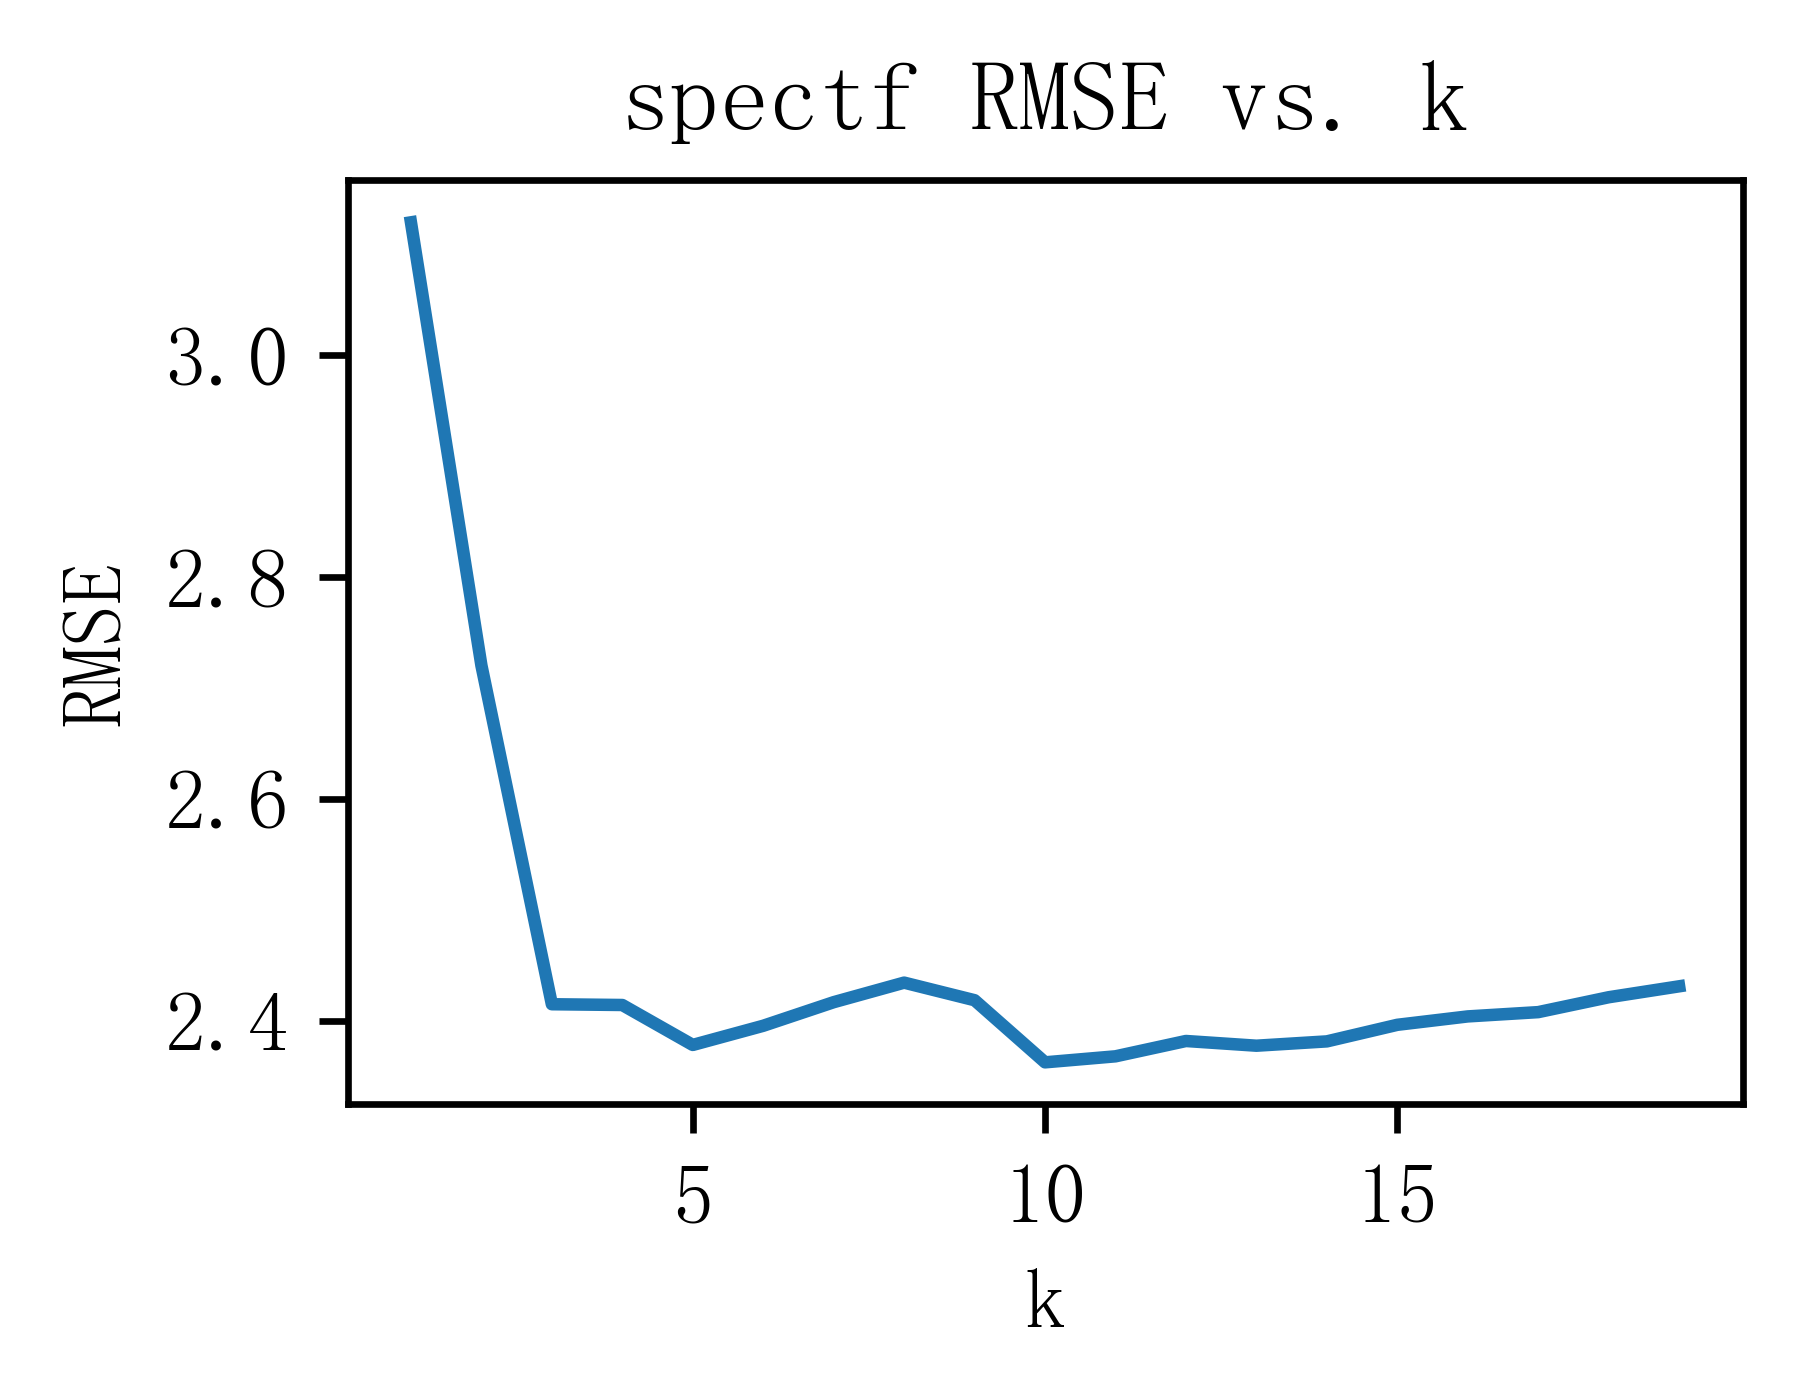

In [12]:
# 设置图像尺寸和分辨率
fig = plt.figure(figsize=(3, 2), dpi=600)

# 设置字体
plt.rcParams['font.sans-serif'] = ['SimSun']  # 设置宋体
plt.rcParams['font.serif'] = ['Times New Roman']  # 设置新罗马
plt.rcParams['font.size'] = 10  # 设置字号为10pt

# 生成 k 值和均方根误差
#k_values = range(1, 21)
#rmse_values = np.random.rand(20) * 10  # 生成随机均方根误差

# 绘制图像
plt.plot(k_values, X_rmse_mean)
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('spectf RMSE vs. k')

# 保存图像
plt.savefig('k_rmse_knn_RF.tiff')

In [13]:
# 首先，我们需要将这三个数组堆叠在一起以形成一个新数组
merged_array = np.column_stack((k_values, X_rmse_values, X_rmse_mean))
# 接着，我们将这个数组转换为 Pandas DataFrame
df = pd.DataFrame(merged_array)
# 最后，我们可以将这个 DataFrame 输出到 CSV 文件中
df.to_csv('spectfKNN_K.csv', index=False)  #index=False 表示在输出的 CSV 文件中不包含索引列

In [14]:
# 将第一列作为X轴，其余列作为y轴
x= merged_array[:, 0]
y = merged_array[:, 1:]
# 对y按列进行规范化
column_norms = np.apply_along_axis(lambda x: np.linalg.norm(x), 0, y)
y /= column_norms

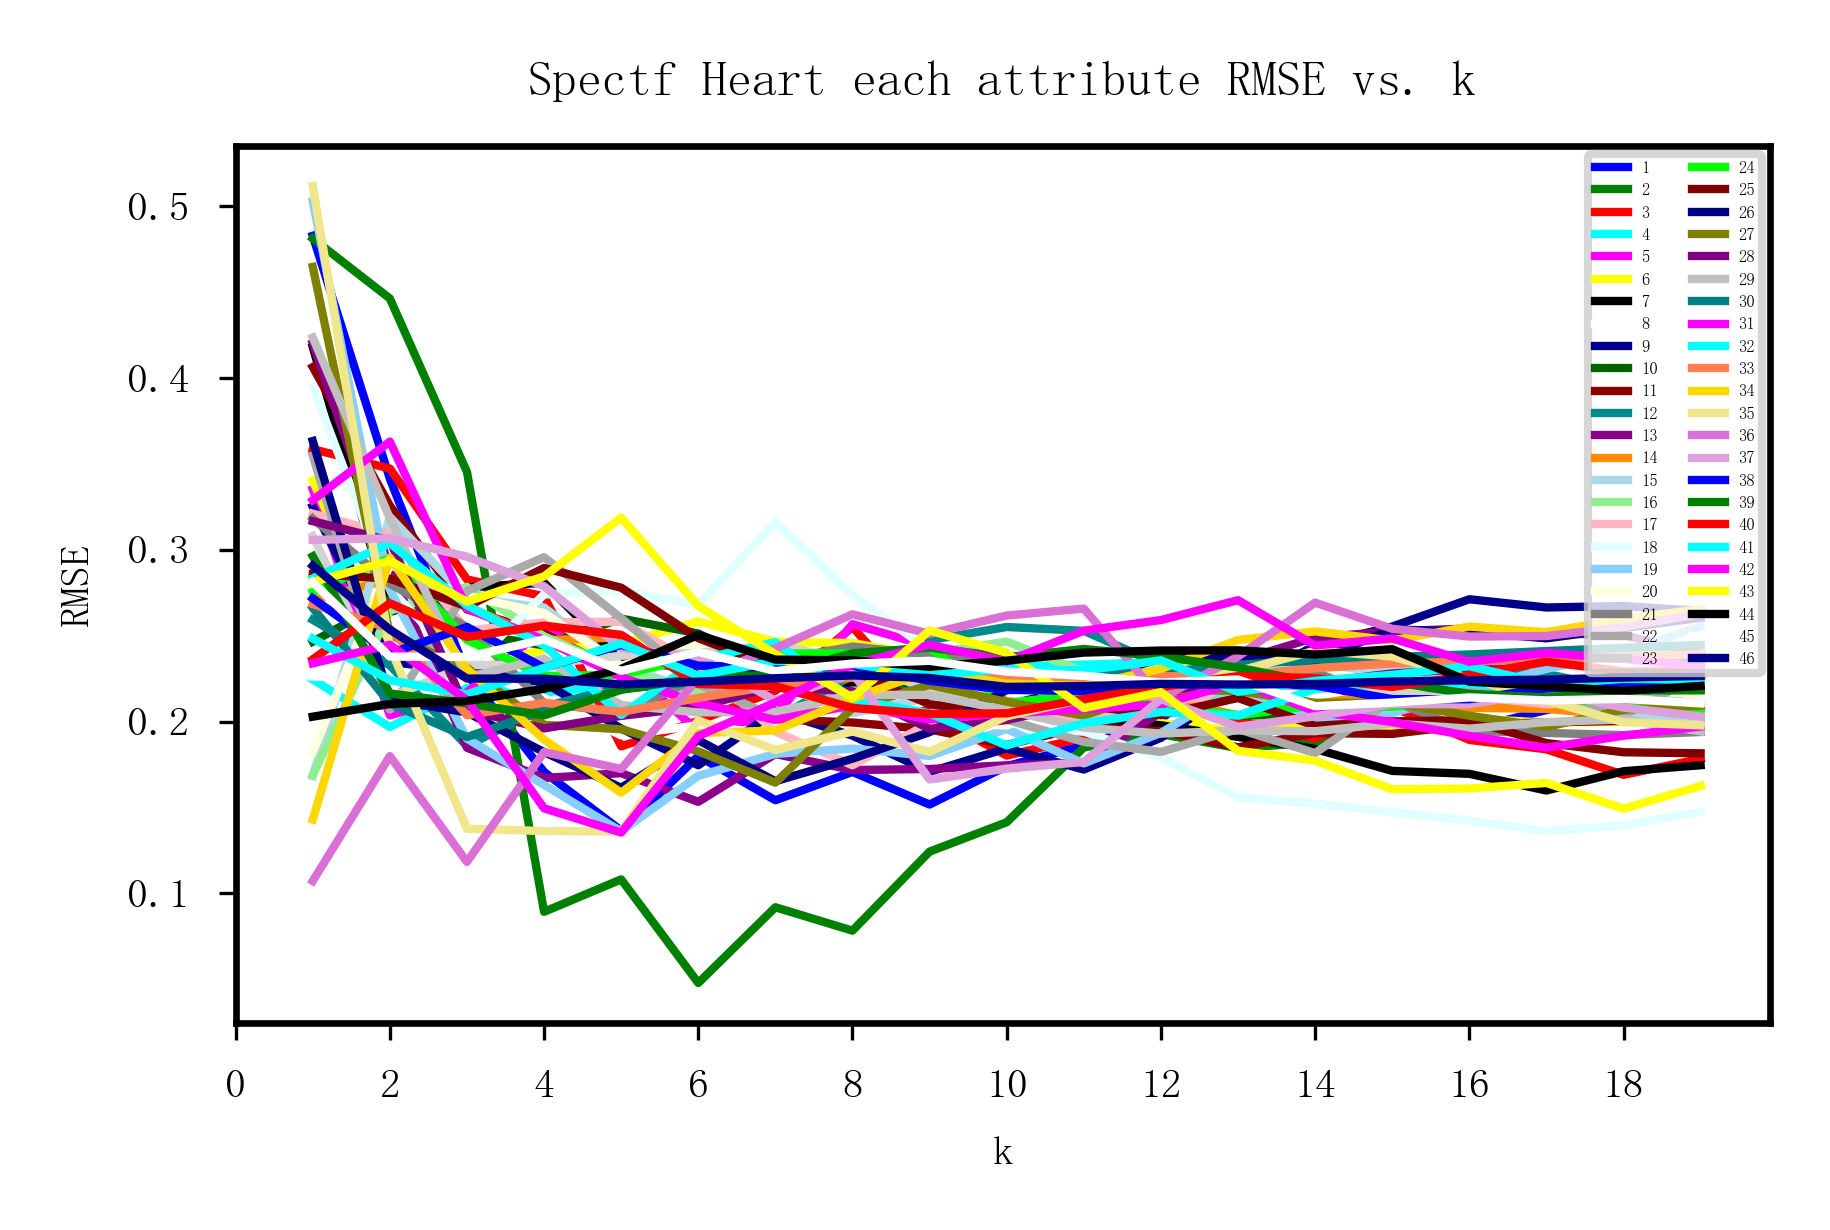

In [16]:


# 设置图像尺寸和分辨率
fig = plt.figure(figsize=(3,2), dpi=600)

# 设置字体
#plt.rcParams['font.sans-serif'] = ['SimSun']  # 设置宋体
#plt.rcParams['font.serif'] = ['Times New Roman']  # 设置新罗马
plt.rcParams['font.serif'] = ['Arial']  # 设置新罗马
plt.rcParams['font.size'] = 5  # 设置字号为10pt
plt.rcParams['lines.linewidth'] = 0.8

# 颜色列表，用于为每条线分配明显不同的颜色
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white', 'darkblue', 'darkgreen', 'darkred', 'darkcyan', 'darkmagenta', 'darkorange',
          'lightblue', 'lightgreen', 'lightpink', 'lightcyan', 'lightskyblue', 'lightyellow','gray', 'darkgray', 'lightgray', 
          'lime', 'maroon', 'navy', 'olive', 'purple', 'silver', 'teal', 'fuchsia','aqua', 'coral', 'gold', 'khaki', 'orchid', 'plum']
# 绘制多条曲线
for i in range(y.shape[1]):
    #color = plt.cm.tab20(i)  # 使用tab20颜色循环为每条线分配不同的颜色
    color = colors[i % len(colors)]  # 使用颜色列表为每条线分配不同的颜色
    plt.plot(x, y[:, i], color=color, label=f"{i+1}",linewidth=1)

# 添加图例和标签
plt.legend(loc='upper right', fontsize=2, ncol=2)

# 设置坐标轴范围和标签
#plt.xlim([0, 20])
# 设置x轴的步长为1
plt.xticks(np.arange(0, 20, step=2))
#plt.ylim([-1, 1])
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('Spectf Heart each attribute RMSE vs. k')

# 设置x轴刻度线的长短和粗细
plt.tick_params(axis='x', which='major', length=2, width=0.4)
plt.tick_params(axis='y', which='major', length=2, width=0.4)
# 调整图形边距
plt.tight_layout()
# 保存图形到文件
fig.savefig('spectfHearteachAttributeK.tiff', dpi=600, bbox_inches='tight')
# 显示图形
plt.show()

In [ ]:
  #计算自变量X的填充性能RMSE 
k_values = []
X_rmse_values=[]
X_rmse_mean=[]

In [13]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=1, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(1)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.10470108005753434
Test MSE: [1.32775120e-01 7.15011962e-05 4.59031100e-05 2.95753589e-05
 1.37340730e-03 1.08141477e-03 1.68038577e-04 2.64355263e-04
 4.54545455e-01]
Test mean MSE: 0.06559497441520468


In [14]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=2, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(2)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.07746216708861287
Test MSE: [9.03110048e-02 5.93301435e-05 4.39742823e-05 2.57775120e-05
 7.66144587e-04 8.14282820e-04 1.21531549e-04 1.73424716e-04
 3.53169856e-01]
Test mean MSE: 0.04949836965045189


In [38]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=3, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled)
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')

Train MSE: 0.07831306160183431
Test MSE: 0.08158501618155237


In [16]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=3, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(3)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.06809231947077278
Test MSE: [7.84157363e-02 5.03621744e-05 4.15337586e-05 2.19597289e-05
 8.27830841e-04 6.42987440e-04 1.04531632e-04 1.90973551e-04
 4.24774056e-01]
Test mean MSE: 0.05611888575447457


In [17]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=4, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(4)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.06468102314260533
Test MSE: [6.93032297e-02 4.43107057e-05 3.82924641e-05 1.95835825e-05
 7.41743683e-04 4.97771924e-04 9.67078162e-05 1.74965946e-04
 4.39144737e-01]
Test mean MSE: 0.05667348251428761


In [18]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=5, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(5)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.06223128849945127
Test MSE: [6.20574163e-02 4.35968900e-05 3.55227273e-05 1.79760766e-05
 6.29901112e-04 4.17051962e-04 9.27914234e-05 1.75929605e-04
 3.97703349e-01]
Test mean MSE: 0.05124150392743222


In [19]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=6, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(6)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.06107137819057832
Test MSE: [6.02073365e-02 4.59222156e-05 3.38915470e-05 1.76908892e-05
 7.43298013e-04 4.03776922e-04 8.82730263e-05 1.60103602e-04
 3.43135300e-01]
Test mean MSE: 0.04498173256782001


In [20]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=7, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(7)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.0610201237677152
Test MSE: [5.84659701e-02 4.45171370e-05 3.48110536e-05 1.80005615e-05
 8.08591349e-04 3.55845572e-04 8.86931147e-05 1.68222439e-04
 3.22844449e-01]
Test mean MSE: 0.04253656668117805


In [21]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=8, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(8)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.060278759780109915
Test MSE: [5.75097189e-02 4.90435295e-05 3.26153185e-05 1.80136065e-05
 8.61758196e-04 3.41428089e-04 9.14980375e-05 1.58981015e-04
 3.19004187e-01]
Test mean MSE: 0.04200747147721043


In [22]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=9, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(9)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.06047711984082701
Test MSE: [5.75639435e-02 5.02322199e-05 3.33772668e-05 1.84037008e-05
 1.00821365e-03 3.58049349e-04 9.27957314e-05 1.62206373e-04
 3.21430681e-01]
Test mean MSE: 0.04230198921065758


In [23]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=10, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(10)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.05943195502569091
Test MSE: [5.66626794e-02 5.06955742e-05 3.50885167e-05 1.80959928e-05
 1.13770302e-03 3.61494489e-04 9.26170514e-05 1.64638068e-04
 3.06339713e-01]
Test mean MSE: 0.040540302783758635


In [24]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=11, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(11)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.05902020388354718
Test MSE: [5.64375816e-02 5.06344161e-05 3.54235043e-05 1.84405769e-05
 1.19044108e-03 3.58949734e-04 9.14094814e-05 1.65649900e-04
 3.13911187e-01]
Test mean MSE: 0.04136219077052606


In [25]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=12, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(12)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.05791422624352877
Test MSE: [5.44673711e-02 5.58707968e-05 3.66037015e-05 1.89393939e-05
 1.31109519e-03 3.70302887e-04 9.57499772e-05 1.58910968e-04
 3.22559476e-01]
Test mean MSE: 0.042119368925918534


In [26]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=13, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(13)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.057280253865173214
Test MSE: [5.43232072e-02 5.98457716e-05 3.91870275e-05 1.95464455e-05
 1.37215541e-03 3.82704636e-04 9.71766814e-05 1.62134980e-04
 3.26335608e-01]
Test mean MSE: 0.04253239620256599


In [27]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=14, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(14)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.05695849612188734
Test MSE: [5.36080461e-02 6.22426094e-05 4.16679890e-05 1.97664413e-05
 1.45128185e-03 3.88200920e-04 9.97003802e-05 1.68221074e-04
 3.24101650e-01]
Test mean MSE: 0.04221564195340218


In [28]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=15, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(15)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.05719267807915868
Test MSE: [5.14673046e-02 6.45544923e-05 4.30914407e-05 1.99296917e-05
 1.52989238e-03 3.77393013e-04 1.00697743e-04 1.72758874e-04
 3.16363636e-01]
Test mean MSE: 0.04112658429160022


In [29]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=16, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(16)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.05719036525272472
Test MSE: [5.12952303e-02 6.66723516e-05 4.60816014e-05 2.03859758e-05
 1.60313943e-03 3.82563024e-04 1.02018446e-04 1.72471639e-04
 3.13341059e-01]
Test mean MSE: 0.0407810690376732


In [30]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=17, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(17)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.057377748521681565
Test MSE: [5.27474711e-02 6.82107912e-05 4.61621082e-05 2.10298671e-05
 1.63361213e-03 3.48578578e-04 1.02009300e-04 1.75698831e-04
 3.20392046e-01]
Test mean MSE: 0.041726091018429605


In [31]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=18, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(18)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.05686287313697528
Test MSE: [5.28050978e-02 7.11462210e-05 4.80469904e-05 2.11126248e-05
 1.62509393e-03 3.47643351e-04 1.02943195e-04 1.77181614e-04
 3.21611584e-01]
Test mean MSE: 0.04186776104028836


In [32]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=19, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(19)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.05678496462499132
Test MSE: [5.33704887e-02 7.29609571e-05 4.93066509e-05 2.11502969e-05
 1.62227688e-03 3.55006251e-04 1.00756653e-04 1.75329100e-04
 3.16637729e-01]
Test mean MSE: 0.04137833380688721


In [33]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=20, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(20)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.057057323430401756
Test MSE: [5.35885167e-02 7.40106908e-05 4.91404755e-05 2.12204695e-05
 1.69571874e-03 3.62779800e-04 1.03519430e-04 1.81412894e-04
 3.14342105e-01]
Test mean MSE: 0.041157602723036285
